In [1]:
import os
import random
import shutil
import numpy as np
from PIL import Image

In [12]:
# paths to original images and masks directories
train_images_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/data/train'
train_masks_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/labels/masks/train'

val_images_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/data/val'
val_masks_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/labels/masks/val'

# lists to hold image and mask paths
all_image_mask_pairs = []

# function to collect image-mask pairs
def collect_image_mask_pairs(images_dir, masks_dir):
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.jpg')]
    pairs = []
    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        base_name = os.path.splitext(img_file)[0]
        mask_filename = base_name + '.png'  # Adjust if your masks have a different naming convention
        mask_path = os.path.join(masks_dir, mask_filename)
        if os.path.exists(mask_path):
            pairs.append((img_path, mask_path))
        else:
            print(f"No mask found for image: {img_file}")
    return pairs

# Collect pairs from training and validation directories
train_pairs = collect_image_mask_pairs(train_images_dir, train_masks_dir)
val_pairs = collect_image_mask_pairs(val_images_dir, val_masks_dir)

# Combine the pairs
all_image_mask_pairs = train_pairs + val_pairs

print(f"Total images with masks after merging: {len(all_image_mask_pairs)}")

Total images with masks after merging: 80000


### Shuffle the Combined Dataset

In [13]:
import random

# Set the random seed for reproducibility
random.seed(42)

# Shuffle the data
random.shuffle(all_image_mask_pairs)


### Split the Data into Training, Validation, and Test Sets


In [14]:
# Desired subset sizes
train_size = 5000
val_size = 1000
test_size = 1000

# Ensure there are enough images
total_available = len(all_image_mask_pairs)
required_total = train_size + val_size + test_size

if total_available < required_total:
    print(f"Not enough images. Available: {total_available}, Required: {required_total}")
    # Adjust sizes proportionally
    scaling_factor = total_available / required_total
    train_size = int(train_size * scaling_factor)
    val_size = int(val_size * scaling_factor)
    test_size = int(test_size * scaling_factor)
    print(f"Adjusted sizes - Training: {train_size}, Validation: {val_size}, Test: {test_size}")

# Split the data
train_pairs = all_image_mask_pairs[:train_size]
val_pairs = all_image_mask_pairs[train_size:train_size + val_size]
test_pairs = all_image_mask_pairs[train_size + val_size:train_size + val_size + test_size]

print(f"Training set size: {len(train_pairs)}")
print(f"Validation set size: {len(val_pairs)}")
print(f"Test set size: {len(test_pairs)}")


Training set size: 5000
Validation set size: 1000
Test set size: 1000


In [1]:
images_dir = "100k_images_train/bdd100k/images/100k/train"
masks_dir = "bdd100k_drivable_labels_trainval/bdd100k/labels/drivable/masks/train"

import os
image_mask_pair = []

# Function to collect image-mask pairs
def collect_image_mask_pairs(images_dir, masks_dir):
    # List all JPEG image files in the images directory
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith('.jpg')]
    pairs = []
    for img_file in image_files:
        img_path = os.path.join(images_dir, img_file)
        base_name = os.path.splitext(img_file)[0]
        # Assuming mask files have the same base name with a .png extension
        mask_filename = base_name + '.png'
        mask_path = os.path.join(masks_dir, mask_filename)
        
        # Check if the corresponding mask file exists
        if os.path.exists(mask_path):
            pairs.append((img_path, mask_path))
        else:
            print(f"Warning: No mask found for image: {img_file}")
    
    return pairs

image_mask_pair = collect_image_mask_pairs(images_dir, masks_dir)


In [2]:
import random
random.seed(42)
random.shuffle(image_mask_pair)

In [3]:
train_size = 5000
val_size = 1000
test_size = 1000

train_pairs = image_mask_pair[:train_size]
val_pairs = image_mask_pair[train_size:train_size + val_size]
test_pairs = image_mask_pair[train_size + val_size:train_size + val_size + test_size]

print(f"train size: {len(train_pairs)}")
print(f"val_size: {len(val_pairs)}")
print(f"test_size: {len(test_pairs)}")

train size: 5000
val_size: 1000
test_size: 1000


In [4]:
import os

# Base directories for subsets
base_data_dir = 'data_subset'
base_masks_dir = 'labels_subset/masks'

# Paths for each subset
subset_train_images_dir = os.path.join(base_data_dir, 'train')
subset_train_masks_dir = os.path.join(base_masks_dir, 'train')

subset_val_images_dir = os.path.join(base_data_dir, 'val')
subset_val_masks_dir = os.path.join(base_masks_dir, 'val')

subset_test_images_dir = os.path.join(base_data_dir, 'test')
subset_test_masks_dir = os.path.join(base_masks_dir, 'test')

# Create directories if they don't exist
os.makedirs(subset_train_images_dir, exist_ok=True)
os.makedirs(subset_train_masks_dir, exist_ok=True)
os.makedirs(subset_val_images_dir, exist_ok=True)
os.makedirs(subset_val_masks_dir, exist_ok=True)
os.makedirs(subset_test_images_dir, exist_ok=True)
os.makedirs(subset_test_masks_dir, exist_ok=True)


In [5]:
base_data_dir

'data_subset'

In [6]:
subset_train_images_dir

'data_subset\\train'

### Directories for the Subsets

In [5]:
import os

# Base directories for subsets
base_data_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/data_subset'
base_masks_dir = '/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/labels_subset/masks'

# Paths for each subset
subset_train_images_dir = os.path.join(base_data_dir, 'train')
subset_train_masks_dir = os.path.join(base_masks_dir, 'train')

subset_val_images_dir = os.path.join(base_data_dir, 'val')
subset_val_masks_dir = os.path.join(base_masks_dir, 'val')

subset_test_images_dir = os.path.join(base_data_dir, 'test')
subset_test_masks_dir = os.path.join(base_masks_dir, 'test')

# Create directories if they don't exist
os.makedirs(subset_train_images_dir, exist_ok=True)
os.makedirs(subset_train_masks_dir, exist_ok=True)
os.makedirs(subset_val_images_dir, exist_ok=True)
os.makedirs(subset_val_masks_dir, exist_ok=True)
os.makedirs(subset_test_images_dir, exist_ok=True)
os.makedirs(subset_test_masks_dir, exist_ok=True)


### Copy the Files to the Subset Directories

In [18]:
import shutil

# Function to copy files to a destination directory
def copy_files(pairs, images_dir, masks_dir):
    for img_path, mask_path in pairs:
        # Copy image
        dst_img_path = os.path.join(images_dir, os.path.basename(img_path))
        shutil.copy(img_path, dst_img_path)

        # Copy mask
        dst_mask_path = os.path.join(masks_dir, os.path.basename(mask_path))
        shutil.copy(mask_path, dst_mask_path)

# Copy training files
copy_files(train_pairs, subset_train_images_dir, subset_train_masks_dir)

# Copy validation files
copy_files(val_pairs, subset_val_images_dir, subset_val_masks_dir)

# Copy test files
copy_files(test_pairs, subset_test_images_dir, subset_test_masks_dir)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the Dataset class
class BDD100KDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted(os.listdir(image_dir))
        self.masks = sorted(os.listdir(mask_dir))
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])
        
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path)
        
        if self.transform:
            image = self.transform(image)
            mask = torch.tensor(np.array(mask), dtype=torch.long)
        
        return image, mask

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize for faster training
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Directories for dataset
train_image_dir = "data_subset/train"
train_mask_dir = "labels_subset/masks/train"
val_image_dir = "data_subset/val"
val_mask_dir = "labels_subset/masks/val"

train_dataset = BDD100KDataset(train_image_dir, train_mask_dir, transform=transform)
val_dataset = BDD100KDataset(val_image_dir, val_mask_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

In [7]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset
import torch

class DrivableAreaDataset(Dataset):
    def __init__(self, images_dir, masks_dir, image_size=(736, 1280)):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_size = image_size
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image and mask
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Resize to consistent dimensions
        image = cv2.resize(image, self.image_size[::-1])  # Reverse to (width, height)
        mask = cv2.resize(mask, self.image_size[::-1], interpolation=cv2.INTER_NEAREST)

        # Normalize the image to [0, 1] and convert to tensor
        image = torch.tensor(image / 255.0, dtype=torch.float32).permute(2, 0, 1)  # Shape: [C, H, W]
        mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]

        return image, mask


In [8]:
from torch.utils.data import DataLoader

# Directories
train_images_dir = "data_subset/train"
train_masks_dir = "labels_subset/masks/train"
val_images_dir = "data_subset/val"
val_masks_dir = "labels_subset/masks/val"
test_images_dir = "labels_subset/masks/test"
test_masks_dir = "labels_subset/masks/test"

# Datasets
train_dataset = DrivableAreaDataset(images_dir=train_images_dir, masks_dir=train_masks_dir)
val_dataset = DrivableAreaDataset(images_dir=val_images_dir, masks_dir=val_masks_dir)
test_dataset = DrivableAreaDataset(images_dir=test_images_dir, masks_dir=test_masks_dir)

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=4)

In [3]:
train_loader

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import segmentation_models_pytorch as smp

c:\Users\xxryk\OneDrive\Desktop\Durham College\4th Year 1st Semester\Advanced Neural Networks Deep Learning For Spatial Analysis\Case Study #2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
for images, masks in train_loader:
    print(f"Mask min: {masks.min()}, Mask max: {masks.max()}")
    break

Mask min: 0, Mask max: 2


In [5]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import segmentation_models_pytorch as smp
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"


# Ensure the device is properly set
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"Using device: {device}")

# Define the model
model = smp.Unet(
    encoder_name='resnet34',       # Encoder: ResNet34
    encoder_weights='imagenet',   # Use ImageNet pre-trained weights
    in_channels=3,                # RGB input
    classes=3                    # Binary segmentation (1 output channel)
).to(device)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


# Initialize lists to store loss values
train_losses = []
val_losses = []

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    # Training phase
    for images, masks in train_loader:
        images, masks = images.to(device), masks.to(device)  # Move to GPU/CPU

        # Forward pass
        outputs = model(images)  # Predicted outputs
        loss = criterion(outputs, masks)  # Add channel dimension to masks

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)  # Accumulate loss

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)  # Store training loss
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation for validation
        for images, masks in val_loader:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)  # Accumulate validation loss

    # Calculate average validation loss for the epoch
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)  # Store validation loss
    print(f"Validation Loss: {val_loss:.4f}")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.legend()
plt.grid()

# Save the plot as an image
plot_path = "training_vs_validation_loss.png"
plt.savefig(plot_path)  # Save the plot
plt.show()

print(f"Plot saved as {plot_path}")



c:\Users\xxryk\OneDrive\Desktop\Durham College\4th Year 1st Semester\Advanced Neural Networks Deep Learning For Spatial Analysis\Case Study #2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda


RuntimeError: input and target batch or spatial sizes don't match: target [16, 720, 1280], input [16, 3, 256, 256]

In [40]:
import matplotlib.pyplot as plt
import random


def preprocess_image(image_path, image_size=(736, 1280)):
    """
    Preprocess the input image: resize, normalize, and convert to tensor.
    """
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size[::-1])  # Resize to (width, height)
    image = image / 255.0  # Normalize to [0, 1]
    image = torch.tensor(image, dtype=torch.float32).permute(2, 0, 1)  # Convert to tensor [C, H, W]
    return image.unsqueeze(0)  # Add batch dimension


def preprocess_mask(mask_path, image_size=(736, 1280)):
    """
    Preprocess the ground truth mask: resize and convert to tensor.
    """
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, image_size[::-1], interpolation=cv2.INTER_NEAREST)  # Resize to (width, height)
    mask = torch.tensor(mask, dtype=torch.long)  # Convert to tensor [H, W]
    return mask


def display_results(image, ground_truth, predicted, idx):
    """
    Display the input image, ground truth mask, and predicted segmentation.
    """
    # Convert tensors to numpy arrays for visualization
    image = image.squeeze(0).permute(1, 2, 0).cpu().numpy()  # [H, W, C]
    ground_truth = ground_truth.cpu().numpy()  # [H, W]
    predicted = predicted.cpu().numpy()  # [H, W]

    # Plot the results
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(image)
    axs[0].set_title(f"Input Image {idx + 1}")
    axs[0].axis("off")

    axs[1].imshow(ground_truth, cmap='viridis')
    axs[1].set_title(f"Ground Truth {idx + 1}")
    axs[1].axis("off")

    axs[2].imshow(predicted, cmap='viridis')
    axs[2].set_title(f"Predicted Mask {idx + 1}")
    axs[2].axis("off")

    plt.show()

In [45]:
# Paths to test images and masks
test_images_dir = "/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/data_subset/test"
test_masks_dir = "/home/mohsin/School/Fall2024/Spatial_Analysis/Case_Study2/labels_subset/masks/test"


# Randomly pick 3 images
image_files = sorted(os.listdir(test_images_dir))
mask_files = sorted(os.listdir(test_masks_dir))


# Ensure image and mask file correspondence
assert len(image_files) == len(mask_files), "Mismatch in number of images and masks."
for img, mask in zip(image_files, mask_files):
    assert os.path.splitext(img)[0] == os.path.splitext(mask)[0], "Image and mask filenames do not match."

# Randomly pick 3 indices
random_indices = random.sample(range(len(image_files)), 3)


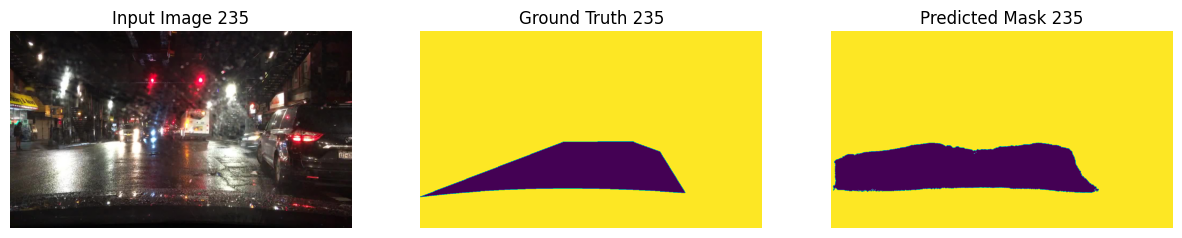

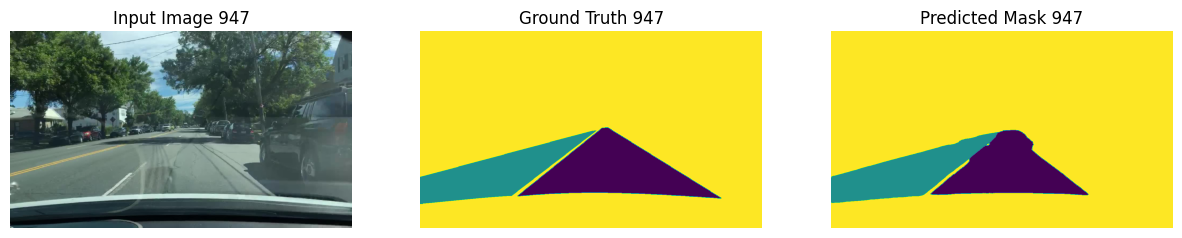

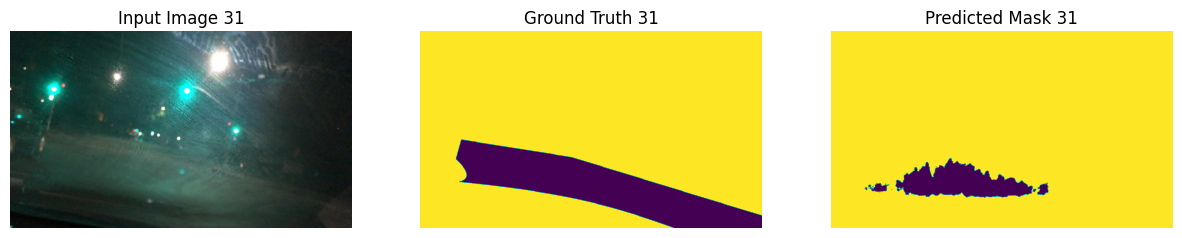

In [46]:
# Load and predict for 3 random images with their corresponding masks
model.eval()  # Set model to evaluation mode
for idx in random_indices:
    image_path = os.path.join(test_images_dir, image_files[idx])
    mask_path = os.path.join(test_masks_dir, mask_files[idx])

    # Preprocess image and mask
    image = preprocess_image(image_path).to(device)
    ground_truth = preprocess_mask(mask_path).to(device)

    # Predict segmentation
    with torch.no_grad():
        output = model(image)  # Model output: [1, num_classes, H, W]
        predicted = torch.argmax(output, dim=1).squeeze(0)  # Predicted mask: [H, W]

    # Display the results
    display_results(image, ground_truth, predicted, idx)

In [47]:
def compute_iou(pred_mask, true_mask, num_classes):
    """
    Compute IoU for each class and the mean IoU.
    Args:
        pred_mask (torch.Tensor): Predicted mask of shape [H, W].
        true_mask (torch.Tensor): Ground truth mask of shape [H, W].
        num_classes (int): Number of classes.
    Returns:
        per_class_iou (list): IoU for each class.
        mean_iou (float): Mean IoU across all classes.
    """
    pred_mask = pred_mask.cpu().numpy()
    true_mask = true_mask.cpu().numpy()

    iou_per_class = []
    for cls in range(num_classes):
        intersection = np.logical_and(pred_mask == cls, true_mask == cls).sum()
        union = np.logical_or(pred_mask == cls, true_mask == cls).sum()
        if union == 0:
            iou = float('nan')  # If no pixels belong to this class in both masks
        else:
            iou = intersection / union
        iou_per_class.append(iou)

    # Compute mean IoU ignoring NaN values
    mean_iou = np.nanmean(iou_per_class)
    return iou_per_class, mean_iou

In [48]:
num_classes = 3  # Update based on your dataset

# Accumulate IoU for all images
iou_scores = []
model.eval()
with torch.no_grad():
    for image_path, mask_path in zip(image_files, mask_files):
        # Load and preprocess image and mask
        image = preprocess_image(os.path.join(test_images_dir, image_path)).to(device)
        ground_truth = preprocess_mask(os.path.join(test_masks_dir, mask_path)).to(device)

        # Predict segmentation
        output = model(image)
        predicted = torch.argmax(output, dim=1).squeeze(0)  # Predicted mask: [H, W]

        # Compute IoU
        _, mean_iou = compute_iou(predicted, ground_truth, num_classes=num_classes)
        iou_scores.append(mean_iou)

# Calculate average IoU over the dataset
dataset_mean_iou = np.nanmean(iou_scores)
print(f"Test Mean IoU: {dataset_mean_iou:.4f}")


Test Mean IoU: 0.7028


In [49]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

def get_train_augmentation():
    """
    Augmentation pipeline for training images and masks.
    """
    return A.Compose([
        # Spatial Transformations
        A.HorizontalFlip(p=0.5),  # Flip image and mask horizontally
        A.RandomRotate90(p=0.5),  # Rotate 90 degrees randomly

        # Geometric Transformations
        A.ShiftScaleRotate(
            shift_limit=0.1, scale_limit=0.2, rotate_limit=15, p=0.5, border_mode=0
        ),

        # Crop and Resize
        A.RandomCrop(height=512, width=512, p=1.0),  # Crop to a fixed size
        A.Resize(height=736, width=1280),  # Resize to fixed size (ensure divisible by 32)

        # Photometric Transformations (applied to images only)
        A.RandomBrightnessContrast(p=0.2),
        A.ColorJitter(p=0.2),

        # Normalize and Convert to Tensors
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])

def get_validation_augmentation():
    """
    Minimal preprocessing for validation images and masks.
    """
    return A.Compose([
        A.Resize(height=736, width=1280),  # Resize to fixed size
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])


In [50]:
import cv2
import torch
from torch.utils.data import Dataset

class DrivableAreaDatasetAugmented(Dataset):
    def __init__(self, images_dir, masks_dir, transform=None):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.image_files = sorted(os.listdir(images_dir))
        self.mask_files = sorted(os.listdir(masks_dir))
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        # Load image and mask
        img_path = os.path.join(self.images_dir, self.image_files[idx])
        mask_path = os.path.join(self.masks_dir, self.mask_files[idx])

        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

        # Apply augmentations
        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented['image']  # Transformed image tensor
            mask = augmented['mask']    # Transformed mask tensor

        # Convert mask to tensor
        mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]

        return image, mask


In [36]:
# Create augmented datasets
train_dataset_aug = DrivableAreaDatasetAugmented(
    images_dir=train_images_dir,
    masks_dir=train_masks_dir,
    transform=get_train_augmentation(),
)

val_dataset_aug = DrivableAreaDatasetAugmented(
    images_dir=val_images_dir,
    masks_dir=val_masks_dir,
    transform=get_validation_augmentation(),
)

# Create DataLoaders
train_loader_aug = DataLoader(train_dataset_aug, batch_size=4, shuffle=True, num_workers=4)
val_loader_aug = DataLoader(val_dataset_aug, batch_size=4, shuffle=False, num_workers=4)

In [37]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0

    # Training phase
    for images, masks in train_loader_aug:
        images, masks = images.to(device), masks.to(device)  # Move to GPU/CPU

        # Forward pass
        outputs = model(images)  # Predicted outputs
        loss = criterion(outputs, masks)  # Add channel dimension to masks

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)  # Accumulate loss

    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_loader_aug.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0

    with torch.no_grad():  # Disable gradient computation for validation
        for images, masks in val_loader_aug:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item() * images.size(0)  # Accumulate validation loss

    # Calculate average validation loss for the epoch
    val_loss /= len(val_loader_aug.dataset)
    print(f"Validation Loss: {val_loss:.4f}")


/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use 

Epoch [1/5], Loss: 0.3784


/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use 

Validation Loss: 0.1973


/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use 

Epoch [2/5], Loss: 0.3141


/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use 

Validation Loss: 0.1876


/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mask = torch.tensor(mask, dtype=torch.long)  # Shape: [H, W]
/tmp/ipykernel_4613/3745734237.py:32: UserWarning: To copy construct from a tensor, it is recommended to use 

KeyboardInterrupt: 